In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './total_rsv.tsv' 
# ago18.tsv  ago1a.tsv  ago1b.tsv  total_mock.tsv  total_rsv.tsv
df = pd.read_csv(path, header=None, sep='\t')
df =df.iloc[:,0:2]
df.columns = ['counts','seq']

In [3]:
df.head()

,counts,seq
0,"53,094",TCGCTTGGTGCAGATCGGGAC
1,"1,779",TCCACAGGCTTTCTTGAACTG
2,"1,779",TCCACAGGCTTTCTTGAACTG
3,"1,779",TCCACAGGCTTTCTTGAACTG
4,"1,715",TGACAGAAGAGAGTGAGCAC


In [4]:
df.seq = df.seq.map(lambda x: x.upper())
df

,counts,seq
0,"53,094",TCGCTTGGTGCAGATCGGGAC
1,"1,779",TCCACAGGCTTTCTTGAACTG
2,"1,779",TCCACAGGCTTTCTTGAACTG
3,"1,779",TCCACAGGCTTTCTTGAACTG
4,"1,715",TGACAGAAGAGAGTGAGCAC
...,...,...
146,13,TAAGATAATGCCATGAATTTG
147,13,ATGTGAACAGTGTCAAACAGTGTC
148,12,TACATGTATAAAATTCTGAGGATG
149,11,AGAAGTTTGACTTAGGACAAAACT


In [5]:
df['length_stat'] = df.seq.map(lambda x: True if len(x)>=20 else False)
df

,counts,seq,length_stat
0,"53,094",TCGCTTGGTGCAGATCGGGAC,True
1,"1,779",TCCACAGGCTTTCTTGAACTG,True
2,"1,779",TCCACAGGCTTTCTTGAACTG,True
3,"1,779",TCCACAGGCTTTCTTGAACTG,True
4,"1,715",TGACAGAAGAGAGTGAGCAC,True
...,...,...,...
146,13,TAAGATAATGCCATGAATTTG,True
147,13,ATGTGAACAGTGTCAAACAGTGTC,True
148,12,TACATGTATAAAATTCTGAGGATG,True
149,11,AGAAGTTTGACTTAGGACAAAACT,True


In [6]:
df[df.length_stat == True]

,counts,seq,length_stat
0,"53,094",TCGCTTGGTGCAGATCGGGAC,True
1,"1,779",TCCACAGGCTTTCTTGAACTG,True
2,"1,779",TCCACAGGCTTTCTTGAACTG,True
3,"1,779",TCCACAGGCTTTCTTGAACTG,True
4,"1,715",TGACAGAAGAGAGTGAGCAC,True
...,...,...,...
146,13,TAAGATAATGCCATGAATTTG,True
147,13,ATGTGAACAGTGTCAAACAGTGTC,True
148,12,TACATGTATAAAATTCTGAGGATG,True
149,11,AGAAGTTTGACTTAGGACAAAACT,True


In [7]:
df.seq = df.seq.map(lambda x: x[:20])
df

,counts,seq,length_stat
0,"53,094",TCGCTTGGTGCAGATCGGGA,True
1,"1,779",TCCACAGGCTTTCTTGAACT,True
2,"1,779",TCCACAGGCTTTCTTGAACT,True
3,"1,779",TCCACAGGCTTTCTTGAACT,True
4,"1,715",TGACAGAAGAGAGTGAGCAC,True
...,...,...,...
146,13,TAAGATAATGCCATGAATTT,True
147,13,ATGTGAACAGTGTCAAACAG,True
148,12,TACATGTATAAAATTCTGAG,True
149,11,AGAAGTTTGACTTAGGACAA,True


In [8]:
df = df[['counts','seq']]
df

,counts,seq
0,"53,094",TCGCTTGGTGCAGATCGGGA
1,"1,779",TCCACAGGCTTTCTTGAACT
2,"1,779",TCCACAGGCTTTCTTGAACT
3,"1,779",TCCACAGGCTTTCTTGAACT
4,"1,715",TGACAGAAGAGAGTGAGCAC
...,...,...
146,13,TAAGATAATGCCATGAATTT
147,13,ATGTGAACAGTGTCAAACAG
148,12,TACATGTATAAAATTCTGAG
149,11,AGAAGTTTGACTTAGGACAA


In [9]:
ls_count = []
ls_base = []
for line in df.values.tolist():
    count = int(line[0].replace(',',''))
    ls_count.append(count)
    ls_base.append([i for i in line[1]])
# ls_base

In [10]:
df_base = pd.DataFrame(ls_base)

In [11]:
df_base

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,T,C,G,C,T,T,G,G,T,G,C,A,G,A,T,C,G,G,G,A
1,T,C,C,A,C,A,G,G,C,T,T,T,C,T,T,G,A,A,C,T
2,T,C,C,A,C,A,G,G,C,T,T,T,C,T,T,G,A,A,C,T
3,T,C,C,A,C,A,G,G,C,T,T,T,C,T,T,G,A,A,C,T
4,T,G,A,C,A,G,A,A,G,A,G,A,G,T,G,A,G,C,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,T,A,A,G,A,T,A,A,T,G,C,C,A,T,G,A,A,T,T,T
147,A,T,G,T,G,A,A,C,A,G,T,G,T,C,A,A,A,C,A,G
148,T,A,C,A,T,G,T,A,T,A,A,A,A,T,T,C,T,G,A,G
149,A,G,A,A,G,T,T,T,G,A,C,T,T,A,G,G,A,C,A,A


In [12]:
for i in range(20):
    df_base.iloc[:,i] = df_base.iloc[:,i].map(lambda x: x if x!='T' else 'U')
df_base

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,U,C,G,C,U,U,G,G,U,G,C,A,G,A,U,C,G,G,G,A
1,U,C,C,A,C,A,G,G,C,U,U,U,C,U,U,G,A,A,C,U
2,U,C,C,A,C,A,G,G,C,U,U,U,C,U,U,G,A,A,C,U
3,U,C,C,A,C,A,G,G,C,U,U,U,C,U,U,G,A,A,C,U
4,U,G,A,C,A,G,A,A,G,A,G,A,G,U,G,A,G,C,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,U,A,A,G,A,U,A,A,U,G,C,C,A,U,G,A,A,U,U,U
147,A,U,G,U,G,A,A,C,A,G,U,G,U,C,A,A,A,C,A,G
148,U,A,C,A,U,G,U,A,U,A,A,A,A,U,U,C,U,G,A,G
149,A,G,A,A,G,U,U,U,G,A,C,U,U,A,G,G,A,C,A,A


In [13]:
ls_final = []
for i in range(20):
    final_string = ''.join(list(df_base.iloc[:,i] * ls_count))
    ls_final.append(final_string)

In [14]:
ls_ratio_AGCT = []
for i in range(20):
    count_all = len(ls_final[i])
    ratio_A = ls_final[i].count('A')/count_all
    ratio_G = ls_final[i].count('G')/count_all
    ratio_C = ls_final[i].count('C')/count_all
    ratio_T = ls_final[i].count('U')/count_all
    ls_ratio_AGCT.append([ratio_A,ratio_G,ratio_C,ratio_T])

In [15]:
df_ratio = pd.DataFrame(ls_ratio_AGCT,columns=['A','G','C','U'])

In [16]:
df_ratio.index = range(1,df_ratio.shape[0]+1)

In [17]:
df_ratio

,A,G,C,U
1,0.016314,0.004258,0.006819,0.972610
2,0.016093,0.261824,0.680697,0.041386
3,0.250769,0.640776,0.072960,0.035494
4,0.113302,0.097283,0.765429,0.023986
5,0.256060,0.075057,0.072939,0.595945
6,0.114619,0.205021,0.098348,0.582012
7,0.219712,0.630933,0.072749,0.076606
8,0.240831,0.695978,0.010792,0.052399
9,0.022037,0.291228,0.108654,0.578082
10,0.238555,0.630470,0.047835,0.083140


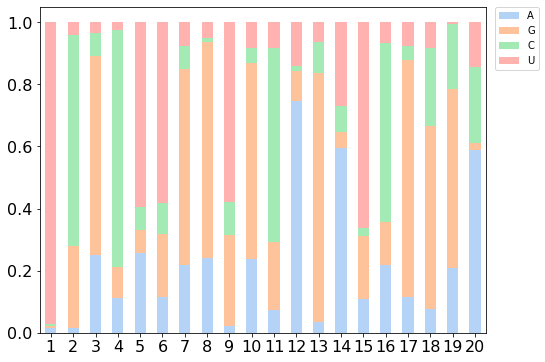

In [18]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)   #调整图片大小

sns.set_palette(sns.color_palette('pastel'))  #设置调色板
df_ratio.plot.bar(stacked=True, alpha=0.8, )   

plt.xticks(fontsize=16, rotation=0)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.xticks(fontsize=16)    #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)    #设置y轴刻度值的字体大小

# plt.legend(fontsize=16)    #设置legend刻度值的字体大小 https://www.jb51.net/article/186659.htm
# num1=0表示legend位于图像的左侧垂直线(这里的其它参数设置：num2=0,num3=3,num4=0)。
# num1=1表示legend位于图像的右侧垂直线(其它参数设置：num2=0,num3=3,num4=0)。
# 为了美观，需要将legend放于图像的外侧，而又距离不是太大，一般设num1=1.05。
# num2=0表示legend位于图像下侧水平线(其它参数设置：num1=1.05,num3=3,num4=0)。
# num2=1表示legend位于图像上侧水平线(其它参数设置：num1=1.05,num3=3,num4=0)。
# 所以，如果希望legend位于图像的右下，需要将num2设为0,位于图像的右上，需要将num2设为1。
# 由于legend是一个方框，bbox_to_anchor=(num1, num2)相当于表示一个点，那么legend的哪个位置位于这个点上呢。参数num3就用以表示哪个位置位于该点。

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)


plt.savefig(path+'.pdf')
plt.show()